<a href="https://colab.research.google.com/github/Rashmi365/ML_Project1/blob/main/Copy_of_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


In [2]:
df=load_boston()
df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dataset=pd.DataFrame(df.data)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
dataset.columns=df.feature_names

In [27]:
#dataset.head()
dataset.shape

(506, 13)

In [7]:
##Independent or dependent feature
x=dataset
y=df.target

In [8]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
##train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=2)

In [10]:
##satandrdizing the Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
xtrain=scaler.fit_transform(xtrain)

In [12]:
xtest=scaler.transform(xtest)

In [29]:
xtest

array([[ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204],
       [ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204],
       [ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204],
       ...,
       [ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204],
       [ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204],
       [ 0.2812156 , -0.48157339,  0.99325028, ...,  1.19748828,
         0.33579343,  0.29137204]])

In [13]:
#to remove scaler effect
#scaler.inverse_transform(xtrain)

In [14]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [15]:
#cross_val_score
from sklearn.model_selection import cross_val_score
mse=cross_val_score(LR,xtrain,ytrain,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-24.644279596531455

In [16]:
ypred=LR.predict(xtest)

In [17]:
ypred

array([23.60107664, 22.04294254, 32.92377058, 31.91022563,  2.99227543,
        2.30931786, 27.24307664, 22.22378555, 15.63121244, 22.01776894,
       30.9081731 , 26.25867172, 20.98500214, 18.08561794, 17.48148297,
       25.66225133, 24.17903047, 13.46872099,  8.11358881, 18.98082595,
       21.86465498, 20.25622265, 36.91155565, 20.90909029, 20.24640709,
       15.37190713, 37.80616835, 34.6731445 , 30.31794568, 23.04231982,
       18.92214187, 20.75992822, 31.34205264, 29.76580943, 13.8418402 ,
       16.3196928 , 13.75124615, 24.26067475, 25.9231117 , 22.99977788,
       28.75660688, 12.3235743 , 31.16617755,  6.53718251, 23.88496902,
       20.92276495, 33.16629819, 19.57388844, 36.464448  ,  0.10366224,
       32.10365338, 31.71501622,  6.71303034, 34.63579086, 20.89498886,
       19.84248247, 19.63295005, 18.5086544 , 15.86301943, 22.63989081,
       19.71274635, 16.11818655, 18.44773944, 32.47889806, 35.32691618,
       24.55178159, 40.85972609, 33.06546131, 14.79984596, 27.22

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

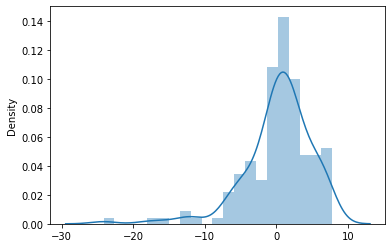

In [18]:
import seaborn as sns
sns.distplot(ypred-ytest)

In [19]:
from sklearn.metrics import r2_score
score=r2_score(ypred,ytest)
score

0.6897023560009194

<ipython-input-20-8fc23d91b831>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


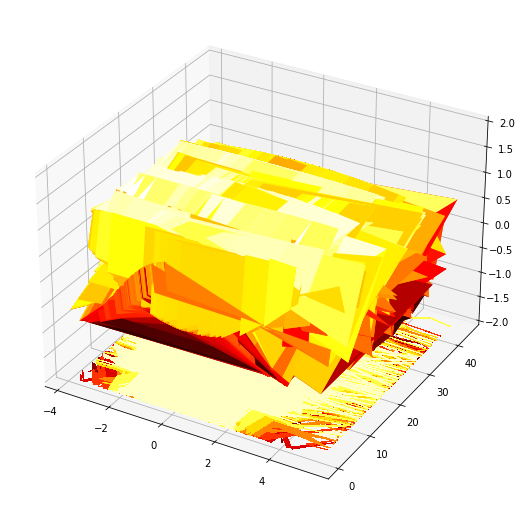

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10,7))
ax=Axes3D(fig)
xtest,ypred=np.meshgrid(xtest,ypred)
R=np.sqrt(xtest ** 2 + ypred ** 2)
Z=np.sin(R)
ax.plot_surface(xtest,ypred,Z,rstride=1,cstride=1,cmap=plt.cm.hot)
ax.contourf(xtest,ypred,Z,zdir='z',offset=-2,cmap=plt.cm.hot)
ax.set_zlim(-2,2)
plt.show()

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [23]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [24]:
print(ridgecv.best_score_)

-25.41683729374233


In [25]:
print(ridgecv.best_params_)

{'alpha': 2}


In [30]:
rpred=ridgecv.predict(xtrain)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

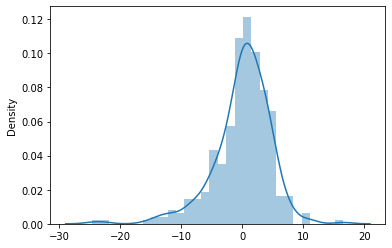

In [33]:
import seaborn as sns
sns.distplot(rpred-ytrain)

In [37]:
from sklearn.metrics import r2_score
score=r2_score(rpred,ytrain)
score

0.6378259524389075